## Business Impact & ROI  

## Оценка потенциального экономического эффекта RFM-сегментации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('rfm_segments.csv')
df

,rfm_categories,min_recency,max_recency,min_frequency,max_frequency,mean_monetary,cnt
0,Hibernating Customers,188.0,333.0,1,1,881,955
1,New Customers,1.0,187.0,1,1,414,731
2,Loyal,1.0,187.0,2,10,3898,398
3,Cannot Lose Them,188.0,332.0,1,12,4181,197
4,Potential Loyalist,1.0,185.0,2,11,1769,507
5,Champions,1.0,186.0,4,13,6996,900
6,Promising,1.0,187.0,1,3,1541,1736
7,At Risk,188.0,327.0,2,3,1350,266


Допущение:

*В рамках анализа выполнена сценарная оценка потенциального прироста выручки при условии применения RFM-ориентированных маркетинговых коммуникаций.
Расчёты основаны на историческом поведении сегментов и консервативных бизнес-гипотезах, а не на фактических результатах кампаний.*

### Выбор сегментов для активного воздействия

**Сегменты для приоритетного воздействия:**  
(высокая ожидаемая отдача)
- Champions  
- Loyal  
- Potential Loyalist  
- Cannot Lose Them  
- At Risk  

**Исключаем из активных инвестиций**:  
(низкий AOV, высокий риск неокупаемости)  
- Hibernating Customers  
- New Customers  

Сегмент Promising не был включён в расчёт потенциального uplift, так как он характеризуется низкой предсказуемостью отклика и умеренным средним чеком. В краткосрочной перспективе маркетинговые инвестиции в данный сегмент имеют более низкий ожидаемый ROI по сравнению с сегментами Champions, Loyal и Potential Loyalist.

### Для каждого сегмента выбираем тип воздействия и основной KPI

| Сегмент            | Тип воздействия          | Основная метрика |
| ------------------ | ------------------------ | ---------------- |
| Champions          | Персональные предложения | ↑ AOV            |
| Loyal              | Кросс-/апселл            | ↑ AOV            |
| Potential Loyalist | Nurture-кампании         | ↑ Frequency      |
| Cannot Lose Them   | Реактивация              | Return rate      |
| At Risk            | Реактивация              | Return rate      |


### Задаем гипотезы uplift

*Значения выбраны консервативно и соответствуют типовым бенчмаркам CRM-маркетинга в ритейле.*

| Сегмент            | Гипотеза                  |
| ------------------ | ------------------------- |
| Champions          | +5% к среднему чеку       |
| Loyal              | +7% к среднему чеку       |
| Potential Loyalist | +1 покупка у 20% клиентов |
| Cannot Lose Them   | 12% клиентов вернутся     |
| At Risk            | 7% клиентов вернутся      |


### Формулы расчёта эффекта

- **Для роста среднего чека (AOV)**

*ΔRevenue = cnt × mean_monetary × uplift*

Champions ΔRevenue = 900 × 6996 × 5% ≈ 315 000

Loyal ΔRevenue = 398 × 3898 × 7% ≈ 108 000

- **Для роста частоты покупок**

*ΔRevenue = cnt × share_affected × mean_monetary × additional_purchases*

Potential Loyalist ΔRevenue = 507 × 20% × 1769 × 1 ≈ 179 000

- **Для реактивации**

*ΔRevenue = cnt × reactivation_rate × mean_monetary*

Cannot Lose Them ΔRevenue = 197 × 12% × 4181 ≈ 99 000

At Risk ΔRevenue = 266 × 7% × 1350 ≈ 25 000

### Прирост выручки 

| Сегмент            | Клиенты | Гипотеза         | Δ выручки    |
| ------------------ | ------- | ---------------- | ------------ |
| Champions          | 900     | +5% AOV          | 315 000      |
| Loyal              | 398     | +7% AOV          | 108 000      |
| Potential Loyalist | 507     | +1 покупка у 20% | 179 000      |
| Cannot Lose Them   | 197     | 12% реактивация  | 99 000       |
| At Risk            | 266     | 7% реактивация   | 25 000       |
| **Итого**          |         |                  | **~726 000** |


Даже при консервативных предположениях модель демонстрирует существенный потенциал

X% = ΔRevenue / Current Revenue × 100%

Current Revenue=∑(cnt×mean monetary)

Где:
- ΔRevenue — тот uplift, который мы уже посчитали (≈ 726 600 ₽)
- Current Revenue — текущая базовая выручка по этой клиентской базе (13 747 600 ₽)

Потенциальный рост выручки составляет ~**5.3%** без привлечения нового трафика, исключительно за счёт изменения поведения текущей клиентской базы.

## ROI-логика

В рамках данной работы предполагается, что основным каналом воздействия является SMS-коммуникация, так как именно этот инструмент доступен компании и может быть использован для персонализированного таргетинга по RFM-сегментам.

Оценка прироста (uplift) отражает совокупный эффект от таргетированных SMS-кампаний, включая напоминание о бренде, персонализацию предложения и стимуляцию повторной покупки.

Для оценки затрат использованы следующие допущения:  
- стоимость одного SMS — 2 ₽,  
- 1 SMS для upsell-кампаний,  
- 2 SMS для nurture- и реактивационных кампаний.  

Оценка совокупных затрат:  
| Тип кампании                            | Оценка затрат, ₽ |
| --------------------------------------- | ---------------- |
| Upsell (Champions, Loyal)               | ~2 600           |
| Nurture (Potential Loyalist)            | ~2 000           |
| Реактивация (Cannot Lose Them, At Risk) | ~1 300           |
| **Итого**                               | **~5 900**       |

*Фактический вклад SMS в прирост метрик может отличаться от оценочного. Для точной оценки эффекта рекомендуется проведение A/B-тестов с контрольной группой и анализ инкрементального прироста (uplift).*

При ожидаемом приросте выручки ~726 тыс. ₽ и маркетинговых затратах ~6 тыс. ₽:  
- ROI кампаний является кратно положительным,  
- основной вклад в эффект обеспечивают сегменты Champions, Loyal и Potential Loyalist,  
- RFM-сегментация позволяет перераспределить маркетинговые бюджеты в пользу наиболее ценных клиентов и отказаться от массовых неэффективных коммуникаций.


## Ограничения и дальнейшие шаги   

Оценка эффекта основана на сценарных допущениях и не учитывает влияние других возможных факторов (сезонность, офлайн-активности, внешние события).

Для получения точной инкрементальной оценки рекомендуется:  
- проведение A/B-тестов с контрольной группой,  
- тестирование различных креативов и частоты SMS,  
- последующий пересмотр uplift-гипотез на основе фактических данных.  

## Выводы

RFM-сегментация позволяет перераспределить маркетинговые бюджеты в пользу 5 ключевых сегментов, обеспечивающих основной потенциал роста.
Сценарная оценка показывает, что даже при консервативных допущениях таргетированные кампании могут обеспечить прирост выручки порядка 5% за период, при минимальных дополнительных затратах.

## Визуализации

### Revenue by RFM Segment (Current + Uplift)

Наибольший вклад в потенциальный рост выручки обеспечивают сегменты Champions и Loyal, что подтверждает целесообразность фокусировки маркетинговых усилий на наиболее ценных клиентах.

In [3]:
df = df.set_index("rfm_categories")

Champions_delta_Revenue = df.at["Champions", "cnt"] * df.at["Champions", "mean_monetary"] * 0.05
Loyal_delta_Revenue = df.at["Loyal", "cnt"] * df.at["Loyal", "mean_monetary"] * 0.07
Potential_Loyalist_delta_Revenue = df.at["Potential Loyalist", "cnt"] * 0.2 * df.at["Potential Loyalist", "mean_monetary"] * 1
Cannot_Lose_Them_delta_Revenue = df.at["Cannot Lose Them", "cnt"] * 0.12 * df.at["Cannot Lose Them", "mean_monetary"]
At_Risk_delta_Revenue = df.at["At Risk", "cnt"] * 0.07 * df.at["At Risk", "mean_monetary"]

# Сброс индекса
df = df.reset_index()

delta_map = {
    "Loyal": Loyal_delta_Revenue,
    "Cannot Lose Them": Cannot_Lose_Them_delta_Revenue,
    "Potential Loyalist": Potential_Loyalist_delta_Revenue,
    "Champions": Champions_delta_Revenue,
    "At Risk": At_Risk_delta_Revenue
}

# Фильтрация данных по категориям
df = df[~df["rfm_categories"].isin(["New Customers", "Hibernating Customers", "Promising"])]

# Добавление новых колонок
df["delta_revenue"] = df["rfm_categories"].map(delta_map)
df["total_revenue"] = df['mean_monetary'] * df['cnt']

# Сортировка 
df["total_plus_delta"] = df["total_revenue"] + df["delta_revenue"]
df = df.sort_values("total_plus_delta", ascending=False)

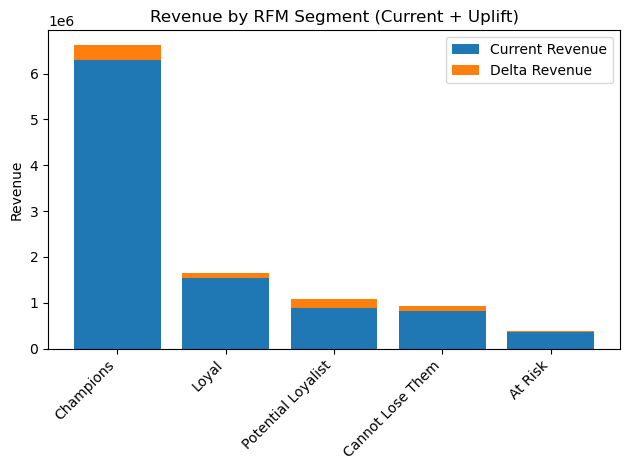

In [4]:
plt.bar(
    df["rfm_categories"],
    df["total_revenue"],
    label="Current Revenue"
)

plt.bar(
    df["rfm_categories"],
    df["delta_revenue"],
    bottom=df["total_revenue"],
    label="Delta Revenue"
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Revenue")
plt.title("Revenue by RFM Segment (Current + Uplift)")
plt.legend()

plt.tight_layout()
plt.show()

### Percentage Revenue Waterfall by RFM Segments

Более 80% ожидаемого прироста формируется за счёт 3 сегментов, что позволяет оптимизировать маркетинговые затраты без потери эффекта.

In [5]:
df["delta_revenue"] = df["delta_revenue"].fillna(0)

base_revenue = df["total_revenue"].sum()

# перевод дельт в проценты от базы
df["delta_pct"] = df["delta_revenue"] / base_revenue * 100

# сортировка для красоты (по убыванию вклада)
df = df.sort_values("delta_pct", ascending=False).reset_index(drop=True)

labels = df["rfm_categories"].tolist()
changes = df["delta_pct"].values

start_value = 100
end_value = start_value + changes.sum()

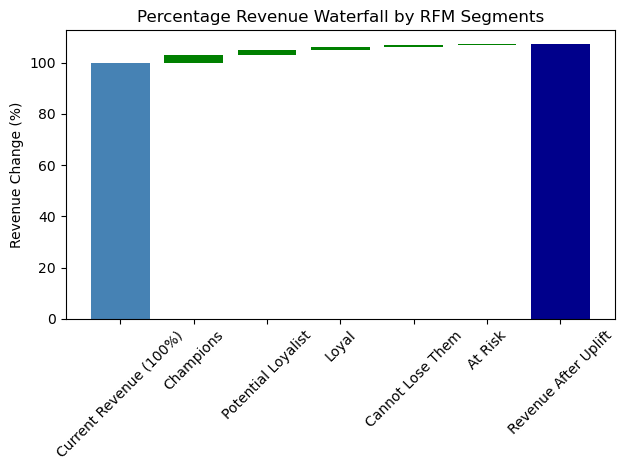

In [6]:
fig, ax = plt.subplots() 

# старт — 100%
ax.bar(
    "Current Revenue (100%)",
    start_value,
    color="steelblue"
)

running_total = start_value

for label, change in zip(labels, changes):
    ax.bar(
        label,
        change,
        bottom=running_total,
        color="green" if change >= 0 else "red"
    )
    running_total += change

# финал
ax.bar(
    "Revenue After Uplift",
    end_value,
    color="darkblue"
)

ax.set_ylabel("Revenue Change (%)")
ax.set_title("Percentage Revenue Waterfall by RFM Segments")
ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()